In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#os.listdir in python is used to get the list of all files and directories in the specified directory
from os import listdir

In [3]:
# Getting the list of the 20 directories that exist in folder 20_newsgroups provided in the dataset using listdir 
path_to_20_Classes = r"C:\Users\SHOURYA\Documents\Jupyter Notebooks\TEXT dataset\20_newsgroups"


#Every folder of the 20 newsgroups which essentially are the different classes
folders = listdir(path_to_20_Classes)
print(folders)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
#This will contain the path of every one of the 20000 files in the 20 newsgroups
file_path = []


for current_folder in folders:                #Selecting one of the 20 folders
    folder_path = path_to_20_Classes + '\\' + current_folder   #Path to each file
    files_in_folder = listdir(folder_path)        
    class_wise_address = []                   #Storing the address class wise
    for single_file in files_in_folder:       #Selecting one of the 1000 files
        new_path = folder_path + '\\' + single_file     #Giving each file a path
        class_wise_address.append(new_path)             #Storing the paths of each file
    file_path.append(class_wise_address)                #Storing the paths class wise in a 2D list

    
(file_path)

[['C:\\Users\\SHOURYA\\Documents\\Jupyter Notebooks\\TEXT dataset\\20_newsgroups\\alt.atheism\\49960',
  'C:\\Users\\SHOURYA\\Documents\\Jupyter Notebooks\\TEXT dataset\\20_newsgroups\\alt.atheism\\51060',
  'C:\\Users\\SHOURYA\\Documents\\Jupyter Notebooks\\TEXT dataset\\20_newsgroups\\alt.atheism\\51119',
  'C:\\Users\\SHOURYA\\Documents\\Jupyter Notebooks\\TEXT dataset\\20_newsgroups\\alt.atheism\\51120',
  'C:\\Users\\SHOURYA\\Documents\\Jupyter Notebooks\\TEXT dataset\\20_newsgroups\\alt.atheism\\51121',
  'C:\\Users\\SHOURYA\\Documents\\Jupyter Notebooks\\TEXT dataset\\20_newsgroups\\alt.atheism\\51122',
  'C:\\Users\\SHOURYA\\Documents\\Jupyter Notebooks\\TEXT dataset\\20_newsgroups\\alt.atheism\\51123',
  'C:\\Users\\SHOURYA\\Documents\\Jupyter Notebooks\\TEXT dataset\\20_newsgroups\\alt.atheism\\51124',
  'C:\\Users\\SHOURYA\\Documents\\Jupyter Notebooks\\TEXT dataset\\20_newsgroups\\alt.atheism\\51125',
  'C:\\Users\\SHOURYA\\Documents\\Jupyter Notebooks\\TEXT dataset\\20_new

In [5]:
#Stopwords are the English words which does not add much meaning to a sentence.
#They can safely be ignored without sacrificing the meaning of the sentence. 
#For example, the words like the, he, have etc. 
#Such words are already captured this in corpus named corpus.
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
#Taking only the English stopwords
stopwords = stopwords.words('english')

In [7]:
#Examples of stopwords
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
#The Python module re provides full support for Perl-like regular expressions in Python. 
#The re module raises the exception re.error if an error occurs while compiling or using a regular expression
import re

#dictionary to store the count of words and would eventually help in finding the probablities
dictionary = {}

In [9]:
#In every class
for class_files in file_path:
    #In all class files
    for single_file in class_files:
        #In every file
        file = open(single_file)
        file_read = file.read()
        
        #Splitting to obtain every single word in the 20000 files
        for each_word in re.split(r"[^abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ]",file_read):
            word = each_word.lower()
            if word not in stopwords:      #Checking to see if the word is a stopword or not since it does not help in classifying
                
                if word in dictionary:
                    dictionary[word] += 1   #If word already is in dictionary, we increase its count
                else:
                    dictionary[word] = 1       #Else a new key is created
        file.close()

In [10]:
#Total number of words in the dictionary
len(dictionary)

119873

In [11]:
#dictionary.items()

In [12]:
#sorting the dictionary in reverse order according to the count of words
dictionary_sorted = sorted(dictionary.items(), key = lambda x: x[1], reverse = True)  #lambda is an anonymous function which returns one expression

In [13]:
dictionary_sorted

[('', 6643867),
 ('edu', 164008),
 ('ax', 62562),
 ('cmu', 52409),
 ('com', 50484),
 ('cs', 45348),
 ('apr', 41439),
 ('news', 34753),
 ('srv', 32363),
 ('cantaloupe', 26048),
 ('net', 25486),
 ('c', 22013),
 ('message', 21955),
 ('subject', 21590),
 ('x', 21158),
 ('lines', 20899),
 ('id', 20846),
 ('date', 20794),
 ('newsgroups', 20404),
 ('path', 20394),
 ('organization', 19840),
 ('state', 18849),
 ('gmt', 17778),
 ('would', 16002),
 ('ohio', 15887),
 ('one', 15742),
 ('r', 14756),
 ('writes', 14686),
 ('article', 13435),
 ('comp', 13103),
 ('w', 13042),
 ('references', 12983),
 ('b', 12707),
 ('talk', 12309),
 ('u', 12173),
 ('misc', 11892),
 ('p', 11811),
 ('ca', 11511),
 ('q', 11396),
 ('f', 11298),
 ('ans', 11078),
 ('sender', 11040),
 ('g', 11024),
 ('e', 10995),
 ('howland', 10981),
 ('reston', 10946),
 ('v', 10815),
 ('people', 10368),
 ('like', 10356),
 ('university', 9961),
 ('posting', 9793),
 ('nntp', 9384),
 ('cc', 9338),
 ('mps', 9215),
 ('know', 9188),
 ('may', 9111),

In [14]:
#Blank space is of no use to us
del dictionary_sorted[0]

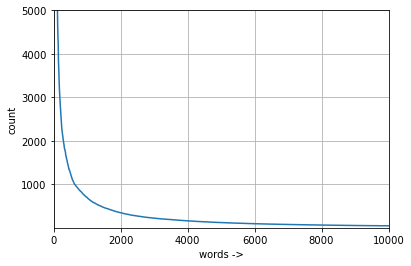

In [15]:
features = dictionary_sorted
feature_words = []
feature_count = []
for i in range(len(features)):
    feature_words.append(i)
    feature_count.append(features[i][1])
plt.plot(feature_words,feature_count)
plt.xlabel("words ->")
plt.ylabel("count")
plt.grid()
plt.axis([0,10000,1,5000])
plt.show()

In [16]:
#deleting words that are not necessarily useful in predicting the classes
del dictionary_sorted[9000:]

In [17]:
#Our datasets
x = []
y = []

In [18]:
#Dictionary to store all the words that we are going to use
word_list = {}
count = 0

for i in dictionary_sorted:
    
    word_list[i[0]] = count    #The words are indexed from 0 to 9000
    count += 1

print(len(word_list))
word_list

9000


{'edu': 0,
 'ax': 1,
 'cmu': 2,
 'com': 3,
 'cs': 4,
 'apr': 5,
 'news': 6,
 'srv': 7,
 'cantaloupe': 8,
 'net': 9,
 'c': 10,
 'message': 11,
 'subject': 12,
 'x': 13,
 'lines': 14,
 'id': 15,
 'date': 16,
 'newsgroups': 17,
 'path': 18,
 'organization': 19,
 'state': 20,
 'gmt': 21,
 'would': 22,
 'ohio': 23,
 'one': 24,
 'r': 25,
 'writes': 26,
 'article': 27,
 'comp': 28,
 'w': 29,
 'references': 30,
 'b': 31,
 'talk': 32,
 'u': 33,
 'misc': 34,
 'p': 35,
 'ca': 36,
 'q': 37,
 'f': 38,
 'ans': 39,
 'sender': 40,
 'g': 41,
 'e': 42,
 'howland': 43,
 'reston': 44,
 'v': 45,
 'people': 46,
 'like': 47,
 'university': 48,
 'posting': 49,
 'nntp': 50,
 'cc': 51,
 'mps': 52,
 'know': 53,
 'may': 54,
 'host': 55,
 'sci': 56,
 'get': 57,
 'n': 58,
 'k': 59,
 'think': 60,
 'usenet': 61,
 'zaphod': 62,
 'l': 63,
 'alt': 64,
 'politics': 65,
 'windows': 66,
 'also': 67,
 'h': 68,
 'time': 69,
 'j': 70,
 'rutgers': 71,
 'use': 72,
 'harvard': 73,
 'eng': 74,
 'near': 75,
 'new': 76,
 'z': 77,
 

In [19]:
for current_class_number in range(20):      #Picking each class
    for files in file_path[current_class_number]:     #Picking all the files in a particular class
        
        #List to store the word count of a file
        current_x = [0 for i in range(len(word_list))]   
        single_file = open(files)
        fread = single_file.read()
        for word in re.split(r"[^abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ]", fread):
            #picking every word and using the lower case version
            word = word.lower()
            if word in word_list:
                
                #If the word is present in the file, we increment its count
                current_x[word_list[word]] += 1
        x.append(current_x)                        #Append the files in our X
        y.append(current_class_number)             #Append the class number of our file

In [20]:
#Converting the x and y to numpy arrays to help in further evaluation
x = np.array(x)
y = np.array(y).reshape(-1, 1)

In [21]:
x.shape

(19997, 9000)

In [22]:
y.shape

(19997, 1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y)

In [25]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(14997, 9000)
(14997, 1)
(5000, 9000)
(5000, 1)


In [26]:
#Test Classification using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
#To check accuracy of our results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [27]:
#Using the multionomial Naive Bayes Classifier
clf = MultinomialNB()

In [28]:
#Fitting Our model
clf.fit(X_train, Y_train.ravel())

MultinomialNB()

In [29]:
#Predictions on test set
Y_pred = clf.predict(X_test)

In [30]:
print("Score on training data:",clf.score(X_train, Y_train))
print("Score on testing data:",clf.score(X_test, Y_test))
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

Score on training data: 0.8921117556844702
Score on testing data: 0.8336
[[195   0   0   0   0   0   0   1   2   0   1   0   0   2   0   0   0   0
    0  42]
 [  0 183   1  11  10  10   5   2   1   1   0   0   5   1   1   0   0   0
    0   0]
 [  0  45  14 105  18  49  11   1   0   0   0   1   9   0   0   0   0   0
    0   0]
 [  1   6   1 232  19   1   8   0   1   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   4   0  12 250   0   2   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  22   0  11   6 188   0   0   2   0   0   0   3   2   4   0   0   0
    0   0]
 [  0   3   1   8   2   0 223   2   1   0   0   0   2   0   0   0   0   1
    0   0]
 [  0   1   0   1   3   0   7 229  11   1   1   0   3   1   0   0   1   0
    0   0]
 [  0   0   0   0   2   0   3   4 224   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   4   3 256   4   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   1   1   1   7 235   0   0   0   0   0   1   0
   

In [31]:
print(X_train.shape)
(Y_train.shape)

(14997, 9000)


(14997, 1)

In [32]:
def fit(X_train, Y_train):
    result = {}; 
    
    #class_values are the unique values in Y_train, and counts stores their count in the list
    class_values, counts = np.unique(Y_train, return_counts=True)
    
    result["total_data"] = len(Y_train)  #Total files in our data
    #picking each class in our data
    for current_class in range(len(class_values)):
        result[current_class] = {}   
        
        #Picking only those rows which output the current class
        current_class_rows = (Y_train == current_class)
        X_train_current_class = X_train[current_class_rows]    #Rows in X_train with current class output
        Y_train_current_class = Y_train[current_class_rows]    #Rows in Y_train with current class output
        result[current_class]["total_count"] = counts[current_class]   #Count of the files of our current class
        
        total_words = 0
        for j in word_list:
            #We'll pick the column in our X_train(of current class) which has the current word and sum it across the rows
            result[current_class][word_list[j]] = (X_train_current_class[:, word_list[j]]).sum()  
            total_words += result[current_class][word_list[j]]   
        
        result[current_class]["total_words"] = total_words    #Total number of a particular word in our class
            
    return result

In [33]:
#For calculating the probability of finding the paticular word for a file
def probability(res, x, curr_class):
    
    #We take the log probability so that the probabilities don't multiply up to zero
    ans = np.log(res[curr_class]["total_count"]) - np.log(res["total_data"])
    
    #No., of features is just the total number of words we'll use
    num_features = len(word_list)
    for i in range(num_features):
        xi = x[i] 
        if(xi != 0):     #If the word is present
            
            curr_class_count_xi = xi * res[curr_class][i] + 1
            curr_class_count = res[curr_class]["total_words"] + len(word_list)
            
            #Formula of probability = count of word in current class / count of all words in the class
            ans += np.log(curr_class_count_xi) - np.log(curr_class_count)   
    return ans 

In [34]:
#For predicting the probabities of every single file which would then be multiplied to get final probability
def predictSinglePoint(res, x):
    
    #The classes are the keys of our dictionary
    classes = res.keys()
    
    #We can initialise like this but I am using bool First run method to avoid it
#     best_p = -1000
#     best_class = -1
    first_run = True
    
    for curr_class in classes:
        
        #This is an extra key we added to know the total data count
        if(curr_class == "total_data"):
            continue
        
        #Calculating the probability of every class and finding the best one
        y = probability( res, x, curr_class)
        if(first_run or (y >= best_p)):
            best_p = y
            best_class = curr_class  #If the probability of a class is higher, that will be our answer
        first_run = False
    return best_class

In [35]:
def predict(res, X_test):
    
    #List to store our predictions
    Y_pred = []
    
    for x in X_test:
        
        #predicting each file
        y = predictSinglePoint(res, x)
        
        #Storing the class
        Y_pred.append(y)
    return Y_pred

In [36]:
#Fitting the model
resulting_dict = fit(X_train, Y_train.ravel())

In [37]:
#Predicting the output
Y_pred_test = predict(resulting_dict, X_test)

In [38]:
#Accuracy obtained
accuracy_score(Y_test, Y_pred_test)

0.8466

In [39]:
print(confusion_matrix(Y_test,Y_pred_test))
print(classification_report(Y_test,Y_pred_test))

[[203   0   0   0   0   0   0   1   2   0   0   0   0   3   0   0   0   0
    0  34]
 [  0 204   0  12   2   3   5   0   0   0   0   0   4   1   0   0   0   0
    0   0]
 [  0  56   5 116  13  33   9   0   1   0   0   4  11   0   1   0   0   0
    4   0]
 [  0   8   0 237  19   0   5   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   2   0  16 245   0   2   0   0   0   0   1   3   0   0   0   0   0
    0   0]
 [  0  33   0  11   7 183   1   0   1   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   3   0   6   3   0 225   1   0   0   0   0   3   0   2   0   0   0
    0   0]
 [  0   1   0   0   1   1   7 239   6   0   0   0   3   0   0   0   1   0
    0   0]
 [  0   1   0   0   1   0   3   5 222   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   1   2 264   1   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   1   4 240   0   0   0   0   0   0   0
    0   0]
 [  0   2   1   0   0   1   0   0   0   0   0 244   3   1   0   0

In [40]:
print("Accuracy of the sklearn model = ", clf.score(X_test, Y_test))
print("Accuracy of the Self Implementation model = ", accuracy_score(Y_test, Y_pred_test))

Accuracy of the sklearn model =  0.8336
Accuracy of the Self Implementation model =  0.8466
